# Solar single photon source

* What photon rate ($\dot{N}$) do we see from solar irradiation?
* Is it possible to bandpass solar irradiation to such a degree to achieve similar specifications (i.e. $\dot{N} = 1~{\rm MHz} \equiv 1~{\rm photon / } \mu{\rm s}$) to a single photon source?
* What is the best wavelength to do this at?

## Theory

\begin{align}
    I &= \frac{P}{A} \\
    A &= \frac{\pi d^2}{4} \\
    P &= \frac{E}{t} = \frac{Nhc}{\lambda t} = \frac{\dot{N}hc}{\lambda}\\[2em]
    \therefore~I &= \frac{4 \dot{N}hc}{\pi d^2 \lambda} \\
    \therefore~\dot{N} &= \frac{I \pi d^2 \lambda}{4hc}
\end{align}

The solar irradiance spectrum is typically referred to as _Air Mass 1.5_, or _AM1.5_,  which is available online (data taken from [here](https://rredc.nrel.gov/solar//spectra/am1.5/)).

\begin{align}
    \therefore~\dot{N} &= \frac{\pi d^2}{4hc} I(\lambda) \lambda \\
    &= \frac{\pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    I(\lambda) \lambda \partial\lambda
\end{align}

Assuming that $I(\lambda)\approx{\rm const.}$ over the range $\Delta\lambda$:

\begin{align}
    \dot{N} &= \frac{\pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    I(\lambda) \lambda \partial\lambda \\
    &\approx \frac{I_0 \pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    \lambda \partial\lambda \\
    &= \frac{I_0 \pi d^2}{4hc} 
    \left[ \frac{\lambda^2}{2} \right]_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} \\
    &\vdots \\
    &= \frac{I_0 \lambda_0 \Delta\lambda \pi d^2}{4hc}
\end{align}

In [1]:
from numpy import *
from matplotlib.pyplot import *
from seaborn import *

set_palette('bright')
set_context('talk')
set_style('ticks')

In [2]:
rcParams['figure.figsize'] = [8,5]
rcParams['figure.dpi'] = 120

## Import data

In [3]:
lambdas, _, _, solar_irradiance = genfromtxt('ASTMG173.csv', delimiter=',', skip_header=2, unpack=True)

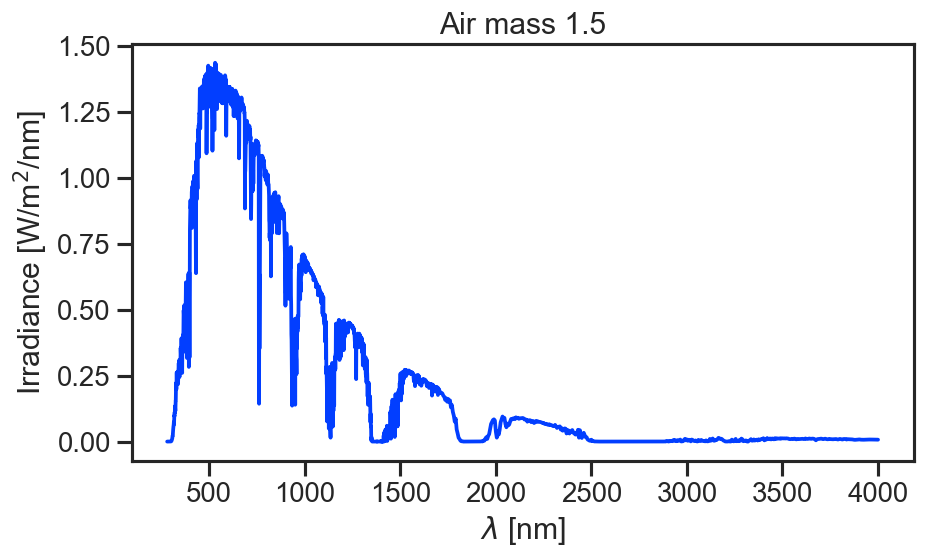

In [4]:
plot(lambdas, solar_irradiance)

xlabel('$\lambda$ [nm]')
ylabel('Irradiance [W/m$^2$/nm]')
title('Air mass 1.5')
tight_layout()
show()

## Solar photon rate

In [5]:
h = 2*pi * 6.626e-34 # [J.s]
c = 3e8 # [m/s]
d = 1e-2 # [m]

lambda_0 = 500e-9 # [m]
delta_lambda = 10e-9 # [m]

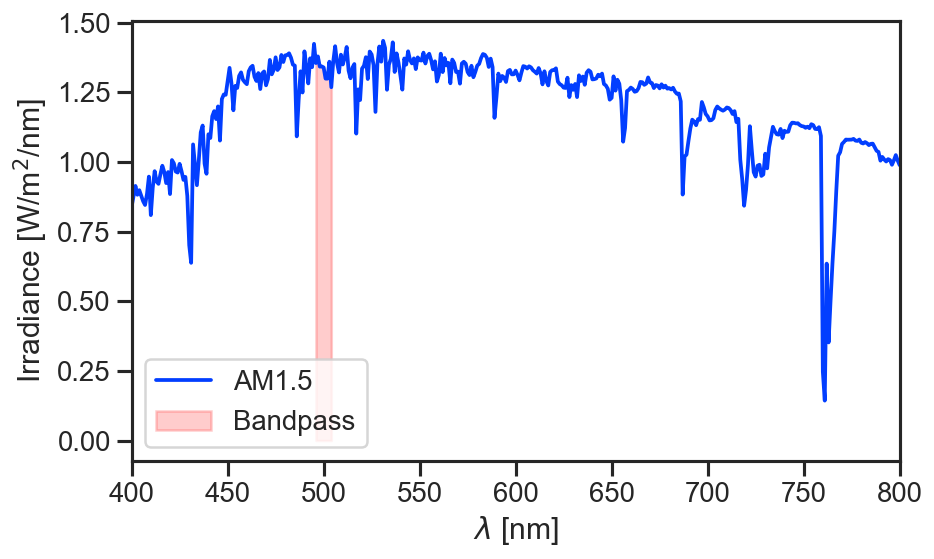

In [6]:
# only data within our bandpass
mask = \
    (lambdas > 1e9*(lambda_0 - delta_lambda/2)) \
    & (lambdas < 1e9*(lambda_0 + delta_lambda/2))

plot(lambdas, solar_irradiance, label='AM1.5')
fill_between(
    x=lambdas[mask], 
    y1=solar_irradiance[mask],  
    color='r', alpha=0.2, label='Bandpass'
)

xlim(400,800)
legend()
xlabel('$\lambda$ [nm]')
ylabel('Irradiance [W/m$^2$/nm]')
tight_layout()
show()

\begin{align}
    \dot{N} &= \frac{\pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    I(\lambda) \lambda \partial\lambda
\end{align}

In [7]:
lambda_range = linspace(
    lambda_0 - delta_lambda/2, 
    lambda_0 + delta_lambda/2, 
    100
) # [m]

intensity_range = interp(
    1e9*lambda_range, # [nm]
    lambdas, # [nm]
    solar_irradiance, # [W/m^2/nm]
) # [W/m^2/nm]

photon_rate = sum(
    ( (pi * d**2) / (4*h*c) )
    * (intensity_range * lambda_range)
) # [Hz]

print('Photon rate: ~%.0e' % photon_rate, 'Hz') # scientific notation

Photon rate: ~4e+15 Hz


## Solar photon rate ($\dot{N}(\lambda)$)

\begin{align}
    \dot{N} &= \frac{\pi d^2}{4hc} I(\lambda) \lambda 
\end{align}

In [8]:
solar_photon_rate = ( (pi * d**2) / (4*h*c) ) * solar_irradiance * lambdas

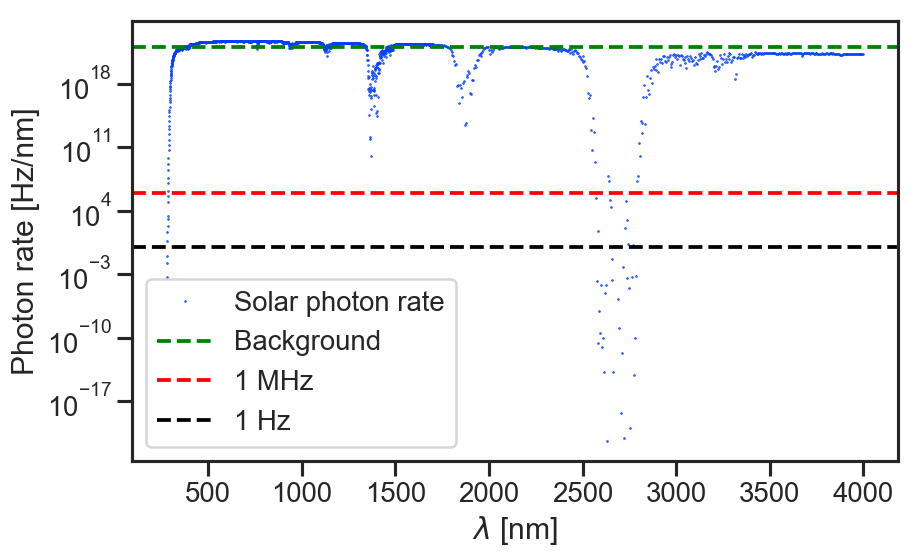

In [9]:
plot(lambdas, solar_photon_rate, '.', ms=1, label='Solar photon rate')
axhline(1e22, ls='--', color='g', label='Background')
axhline(1e6, ls='--', color='r', label='1 MHz')
axhline(1, ls='--', color='k',  label='1 Hz')

yscale('log')
legend()
xlabel('$\lambda$ [nm]')
ylabel('Photon rate [Hz/nm]')
# title('Solar photon rate')
tight_layout()
show()

## Solar single photon source

In [ ]:
# pick d_min
# pick delta_lambda_min
# minimise photon_rate with lambda_0 (bound > 0?)